In [39]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
fpath = '/work/Katherine.Turner/analysis_odiv230/atmos*ps.nc'

In [3]:
ds = xr.open_mfdataset(fpath, use_cftime=True)

In [25]:
slp = ds.ps.chunk({"time": 36500, "lat": 40, "lon": 24})

In [43]:
slp_SO = slp.where(ds.lat < -30)*1e-2

In [27]:
slp_SO

<xarray.DataArray 'ps' (time: 36500, lat: 360, lon: 576)>
dask.array<where, shape=(36500, 360, 576), dtype=float32, chunksize=(36500, 40, 24), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 ... 357.8 358.4 359.1 359.7
  * time     (time) object 0101-01-01 12:00:00 ... 0200-12-31 12:00:00
Attributes:
    long_name:      surface pressure
    units:          Pa
    valid_range:    [ 40000. 110000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

In [28]:
p = slp_SO.polyfit(dim="time", deg=1)

/nbhome/Katherine.Turner/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/core/variable.py:1730: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._stack_once(dims, new_dim)


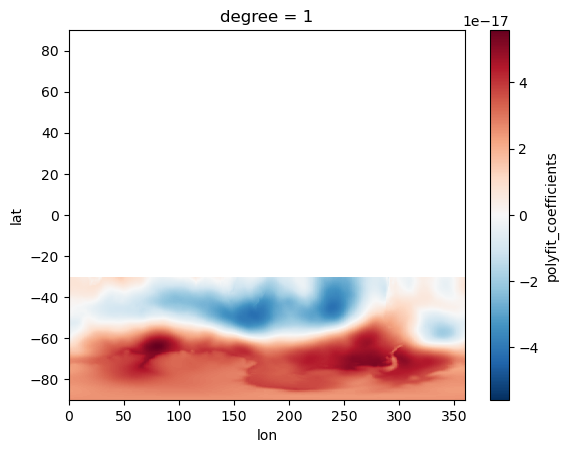

In [36]:
p.polyfit_coefficients[0,:,:].plot()

In [48]:
test_slp = slp_SO[0,:,:].load()

(-90.0, -30.0)

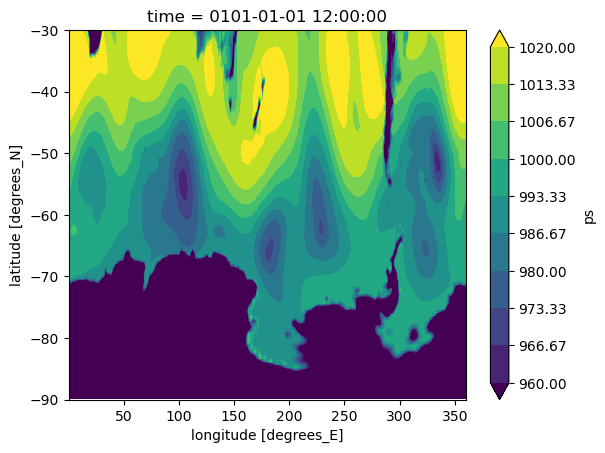

In [55]:
test_slp.plot.contourf(vmin=960, vmax=1020, levels=10)
plt.ylim([-90, -30])

In [58]:
slp_ts = slp.sel({"lat":-50, "lon":110}, method="nearest").load()

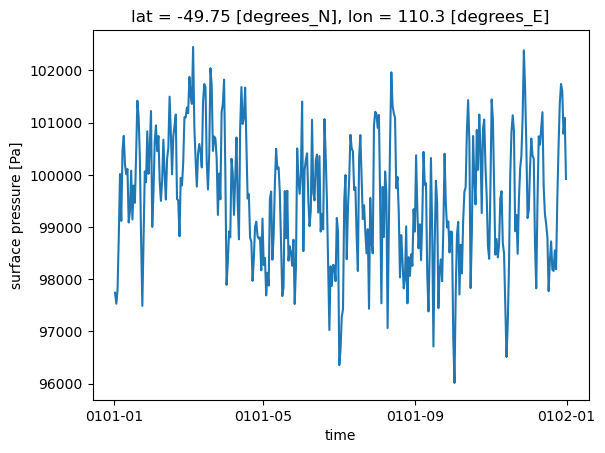

In [61]:
slp_ts[:365].plot()